In [2]:
import csv
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:

psych_csv = Path("psyco.csv")
df = pd.read_csv(psych_csv)
df.head()


,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,18-Dec,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [4]:
# Data cleaning on age column 

def age_modification(age_range):
    if "18-Dec" in age_range:
        return "0-18"
    else:
        return age_range
    
df["age"]=df["age"].apply(age_modification)
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [5]:
# Change the binary columns into useful data for the analysis

# Loop through the rows to recode the values
def recode_hw(value):
    #specify conditions and recoding mappings
    conditions = [11,101,111,1001,1011,1101,1111]
    recoding_mappings=[10,100,110,1000,1010,1100,1110]

    if value in conditions:
        return recoding_mappings[conditions.index(value)]
    else:
        return value

#Apply to binary columns
df["recoded_like_hw"] = df["like_hw"].apply(recode_hw)
df["recoded_dislike_hw"] = df["dislike_hw"].apply(recode_hw)

df.head()


,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000


In [6]:
# Ensure the values were recoded correctly and both columns have the same values

likehw_unique_values = np.sort(df["recoded_like_hw"].unique())
dislike_unique_values = np.sort(df["recoded_dislike_hw"].unique())

print(f"The values in the sorted _like_hw column are {likehw_unique_values}")
print(f"The values in the sorted_dislike_hw column are {dislike_unique_values}")

The values in the sorted _like_hw column are [   1   10  100  110 1000 1010 1100 1110]
The values in the sorted_dislike_hw column are [   1   10  100  110 1000 1010 1100 1110]


In [7]:
# As there are 8 unique values, convert values ino a 8-point scale for easier interpretation
scale_mapping = { 1:1,
                 10:2,
                 100:3,
                 110:4,
                 1000:5,
                 1010:6,
                 1100:7,
                 1110:8}
df["scaled_like_hw"] = df["recoded_like_hw"].map(scale_mapping)
df["scaled_dislike_hw"] = df["recoded_dislike_hw"].map(scale_mapping)

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work,recoded_like_hw,recoded_dislike_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1,Complete Physical Attendance,Yes,NaN,7,NaN,100,1,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1110,Complete Physical Attendance,No,NaN,7,NaN,1110,1110,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,111,Complete Physical Attendance,Yes,NaN,7,NaN,1100,110,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,1111,Complete Physical Attendance,Yes,NaN,7,NaN,100,1110,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,1000,Complete Physical Attendance,Yes,NaN,7,NaN,1010,1000,6,5


In [8]:
# Drop binary columns, recoded columns and unwanted columns

df = df.drop(columns=["like_hw","dislike_hw","recoded_like_hw","recoded_dislike_hw","travel+work","time_bp.1","Unnamed: 19"])

df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,scaled_like_hw,scaled_dislike_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,Complete Physical Attendance,Yes,3,1
1,0-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,Complete Physical Attendance,No,8,8
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,Complete Physical Attendance,Yes,7,4
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,Complete Physical Attendance,Yes,3,8
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,Complete Physical Attendance,Yes,6,5


In [9]:
# Unique counts for work in home environment 
home_envir = {}
home_envir = df["home_env"].value_counts()
dict(home_envir)

{3: 327, 2: 309, 1: 215, 4: 200, 5: 124}

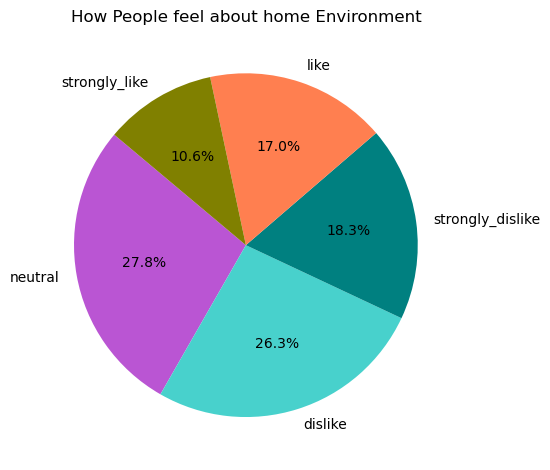

In [28]:
# Create a pie chart

colors = ["mediumorchid","mediumturquoise","teal","coral","olive"]
labels = []
size = []

for x,y in home_envir.items():
    if x == 1:
        labels.append("strongly_dislike")
    if x == 2:
        labels.append("dislike")
    if x == 3:
        labels.append("neutral")
    if x == 4:
        labels.append("like")
    if x == 5:
        labels.append("strongly_like")
    size.append(y)

#plot pie chart

plt.pie(size,labels = labels,colors=colors,autopct="%1.1f%%",shadow=False, startangle=140)
plt.title("How People feel about home Environment")
plt.tight_layout()
plt.show()



In [ ]:
# Interpretation

In [11]:
# determininng the unique counts of individual scales(1 to 8) in scaled like working from home data
individual_scale_counts = {}
individual_scale_counts = df["scaled_like_hw"].value_counts()
dict(individual_scale_counts)

{8: 283, 3: 239, 5: 230, 7: 195, 2: 73, 6: 72, 4: 66, 1: 17}

<function matplotlib.pyplot.show(close=None, block=None)>

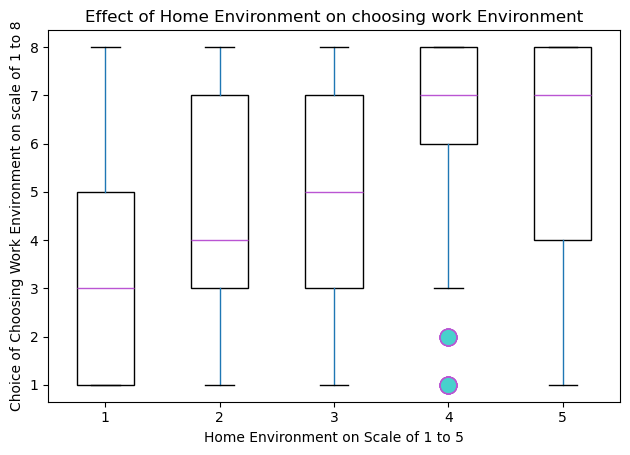

In [31]:
# create a box plot to see how home environment related to liking of working from home
df.boxplot( by="home_env",column=["scaled_dislike_hw"],
           patch_artist=True,
           boxprops=dict(facecolor="white"),
           medianprops=dict(color="mediumorchid"),
           flierprops=dict(marker="o",markerfacecolor="mediumturquoise",
           markersize=12,linestyle="none",markeredgecolor="mediumorchid"))
plt.title("Effect of Home Environment on choosing work Environment")
plt.suptitle("")
plt.xlabel("Home Environment on Scale of 1 to 5")
plt.ylabel("Choice of Choosing Work Environment on scale of 1 to 8")
plt.xticks([1,2,3,4,5])
plt.grid(False)
plt.tight_layout()
plt.show           


                           
                        
            

In [ ]:
#